# Predicting Dengu Fever

**sections**:

1. Summary of findings
2. import data and set up environment
3. EDA
4. Machine Learning

**Section 1** Summary of findings

The data is available here: https://www.drivendata.org/competitions/

The challenge is:

"Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce—can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?"
<br>
<br>
The machine learning produced accuracies of around 67% for San Juan but less than 10% for Iquitos. Some of the challenges - small amount of data, missing fields - had to use mean/median values, too many variables/features. It might be worth experimenting with a basic model first. Note - the two cities show different patterns in vegetation and environmental variables so it is probably better to use different models for each city.
<br>
<br>
My initial attempts gave me a score in the bottom half of the rankings, so far I have been able to improve that, moving into the top 20%.

Section 2
<br>
**Set up environment and import data**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import sklearn.ensemble as ske

from sklearn import preprocessing
from sklearn.preprocessing import Imputer

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# this function will check for nulls within a dataframe

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [4]:
df['city'] = df['city'].map({'sj': 1, 'iq': 2}) # machine learning requires numbers not letters

In [5]:
df_1 = df[df['city']==1]
df_2 = df[df['city']==2]
print(df_1.shape)
print(df_2.shape)

(936, 24)
(519, 24)


So San Juan has almost twice as many rows of data as Iquitos

In [6]:
print(missing_values_table(df_1))

Your selected dataframe has 24 columns.
There are 20 columns that have missing values.
                                       Missing Values  % of Total Values
ndvi_ne                                           191               20.4
ndvi_nw                                            49                5.2
ndvi_se                                            19                2.0
ndvi_sw                                            19                2.0
reanalysis_sat_precip_amt_mm                        9                1.0
precipitation_amt_mm                                9                1.0
station_min_temp_c                                  6                0.6
station_max_temp_c                                  6                0.6
station_diur_temp_rng_c                             6                0.6
station_avg_temp_c                                  6                0.6
reanalysis_tdtr_k                                   6                0.6
reanalysis_specific_humidity_g_per_kg

For San Juan most of the missing data is in the nvdi fields, these fields are a measure of vegetation around the city

In [7]:
print(missing_values_table(df_2))

Your selected dataframe has 24 columns.
There are 20 columns that have missing values.
                                       Missing Values  % of Total Values
station_diur_temp_rng_c                            36                6.9
station_avg_temp_c                                 36                6.9
station_precip_mm                                  15                2.9
station_max_temp_c                                 13                2.5
station_min_temp_c                                  7                1.3
reanalysis_relative_humidity_percent                3                0.6
reanalysis_tdtr_k                                   3                0.6
reanalysis_specific_humidity_g_per_kg               3                0.6
reanalysis_sat_precip_amt_mm                        3                0.6
reanalysis_precip_amt_kg_per_m2                     3                0.6
reanalysis_min_air_temp_k                           3                0.6
reanalysis_max_air_temp_k            

For Iquitos most of the missing data is in the station... fields

One way to deal with missing values is to fill them with appropriate values

get mean and median values for ndvi fields

In [8]:
df_1nemn=df_1.ndvi_ne.mean()
df_1nemd=df_1.ndvi_ne.median()
df_1nwmn=df_1.ndvi_nw.mean()
df_1nwmd=df_1.ndvi_nw.median()
df_1semn=df_1.ndvi_se.mean()
df_1semd=df_1.ndvi_se.median()
df_1swmn=df_1.ndvi_sw.mean()
df_1swmd=df_1.ndvi_sw.median()

df_2nemn=df_2.ndvi_ne.mean()
df_2nemd=df_2.ndvi_ne.median()
df_2nwmn=df_2.ndvi_nw.mean()
df_2nwmd=df_2.ndvi_nw.median()
df_2semn=df_2.ndvi_se.mean()
df_2semd=df_2.ndvi_se.median()
df_2swmn=df_2.ndvi_sw.mean()
df_2swmd=df_2.ndvi_sw.median()

In [9]:
df_2station_diur_temp_rng_c_mean=df_2['station_diur_temp_rng_c'].mean()
df_2station_diur_temp_rng_c_median=df_2['station_diur_temp_rng_c'].median()
df_2station_avg_temp_c_mean=df_2['station_avg_temp_c'].mean()
df_2station_avg_temp_c_median=df_2['station_avg_temp_c'].median()
df_2station_precip_mm_mean=df_2['station_precip_mm'].mean()
df_2station_precip_mm_median=df_2['station_precip_mm'].median()
df_2station_max_temp_c_mean=df_2['station_max_temp_c'].mean()
df_2station_max_temp_c_median=df_2['station_max_temp_c'].median()
df_2station_min_temp_c_mean=df_2['station_min_temp_c'].mean()
df_station_min_temp_c_median=df_2['station_min_temp_c'].median()                                                               

In [10]:
values_1 = {'ndvi_ne':df_1nemd, 'ndvi_nw': df_1nwmd, 'ndvi_se':df_1semd, 'ndvi_sw': df_1swmd}
df_1 = df_1.fillna(value=values_1)

In [11]:
values_2 = {'station_diur_temp_rng_c':df_2station_diur_temp_rng_c_mean, 'station_avg_temp_c': df_2station_avg_temp_c_mean
            , 'station_precip_mm':df_2station_precip_mm_mean, 'station_max_temp_c': df_2station_max_temp_c_mean,
            'station_min_temp_c':df_2station_min_temp_c_mean}
df_2 = df_2.fillna(value=values_2)

In [12]:
print(missing_values_table(df_1))

Your selected dataframe has 24 columns.
There are 16 columns that have missing values.
                                       Missing Values  % of Total Values
precipitation_amt_mm                                9                1.0
reanalysis_sat_precip_amt_mm                        9                1.0
reanalysis_air_temp_k                               6                0.6
reanalysis_avg_temp_k                               6                0.6
reanalysis_dew_point_temp_k                         6                0.6
reanalysis_max_air_temp_k                           6                0.6
reanalysis_min_air_temp_k                           6                0.6
reanalysis_precip_amt_kg_per_m2                     6                0.6
reanalysis_relative_humidity_percent                6                0.6
reanalysis_specific_humidity_g_per_kg               6                0.6
reanalysis_tdtr_k                                   6                0.6
station_avg_temp_c                   

In [13]:
print(missing_values_table(df_2))

Your selected dataframe has 24 columns.
There are 15 columns that have missing values.
                                       Missing Values  % of Total Values
precipitation_amt_mm                                3                0.6
reanalysis_air_temp_k                               3                0.6
reanalysis_avg_temp_k                               3                0.6
reanalysis_dew_point_temp_k                         3                0.6
reanalysis_max_air_temp_k                           3                0.6
reanalysis_min_air_temp_k                           3                0.6
reanalysis_precip_amt_kg_per_m2                     3                0.6
reanalysis_relative_humidity_percent                3                0.6
reanalysis_sat_precip_amt_mm                        3                0.6
reanalysis_specific_humidity_g_per_kg               3                0.6
reanalysis_tdtr_k                                   3                0.6
ndvi_ne                              

In [14]:
df_1stn_avgmn=df_1.station_avg_temp_c.mean()
df_1stn_avgmd=df_1.station_avg_temp_c.median()
df_1stn_diurmn=df_1.station_diur_temp_rng_c.mean()
df_1stn_diurmd=df_1.station_diur_temp_rng_c.median()
df_1stn_maxmn=df_1.station_max_temp_c.mean()
df_1stn_maxmd=df_1.station_max_temp_c.median()
df_1stn_minmn=df_1.station_min_temp_c.mean()
df_1stn_minmd=df_1.station_min_temp_c.median()
df_1perc_amtmn=df_1.precipitation_amt_mm.mean()
df_1perc_amtmd=df_1.precipitation_amt_mm.median()
df_1reanal_sat_percipmn=df_1.reanalysis_sat_precip_amt_mm.mean()
df_1reanal_sat_percipmd=df_1.reanalysis_sat_precip_amt_mm.median() 

df_2stn_avgmn=df_2.station_avg_temp_c.mean()
df_2stn_avgmd=df_2.station_avg_temp_c.median()
df_2stn_diurmn=df_2.station_diur_temp_rng_c.mean()
df_2stn_diurmd=df_2.station_diur_temp_rng_c.median()
df_2stn_maxmn=df_2.station_max_temp_c.mean()
df_2stn_maxmd=df_2.station_max_temp_c.median()
df_2stn_minmn=df_2.station_min_temp_c.mean()
df_2stn_minmd=df_2.station_min_temp_c.median()
df_2perc_amtmn=df_2.precipitation_amt_mm.mean()
df_2perc_amtmd=df_2.precipitation_amt_mm.median()
df_2reanal_sat_percipmn=df_2.reanalysis_sat_precip_amt_mm.mean()
df_2reanal_sat_percipmd=df_2.reanalysis_sat_precip_amt_mm.median() 

In [15]:
values_1_add = {'station_avg_temp_c':df_1stn_avgmd, 'station_diur_temp_rng_c': df_1stn_diurmd, 'station_max_temp_c':df_1semd, 'station_min_temp_c': df_1swmd, 'precipitation_amt_mm': df_1perc_amtmd, 'reanalysis_sat_precip_amt_mm': df_1reanal_sat_percipmd}
df_1 = df_1.fillna(value=values_1_add)

In [16]:
values_2_add = {'station_avg_temp_c':df_2stn_avgmn, 'station_diur_temp_rng_c': df_2stn_diurmn, 'station_max_temp_c':df_2semn, 'station_min_temp_c': df_2swmn, 'precipitation_amt_mm': df_2perc_amtmn, 'reanalysis_sat_precip_amt_mm': df_2reanal_sat_percipmn}
df_2 = df_2.fillna(value=values_2_add)

In [17]:
print(df_1.shape)
print(df_2.shape)
df_1 = df_1.dropna()
df_2 = df_2.dropna()
print(df_1.shape)
print(df_2.shape)

(936, 24)
(519, 24)
(930, 24)
(515, 24)


I lost 21 data rows

**Section 3 - EDA**

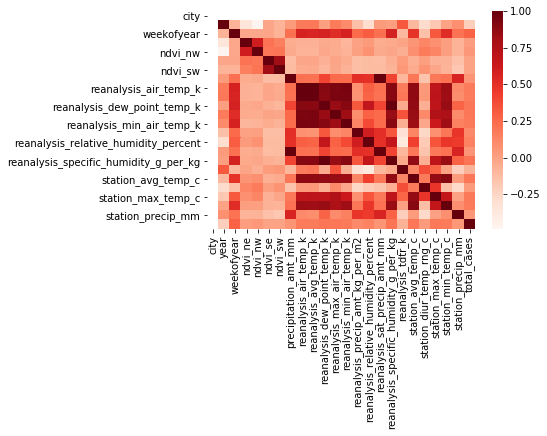

In [18]:
ax = sns.heatmap(df_1.corr(),cmap='Reds')

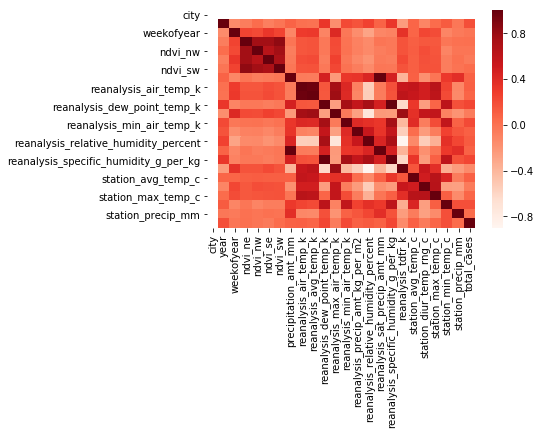

In [19]:
ax = sns.heatmap(df_2.corr(),cmap='Reds')

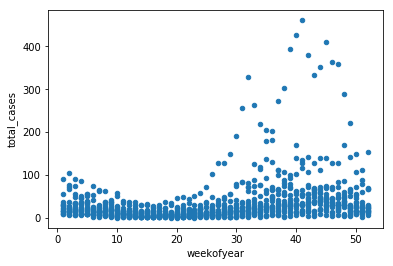

In [20]:
df_1.plot(kind='scatter',x='weekofyear',y='total_cases')
plt.show();

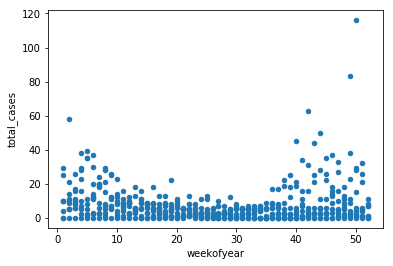

In [21]:
df_2.plot(kind='scatter',x='weekofyear',y='total_cases')
plt.show();

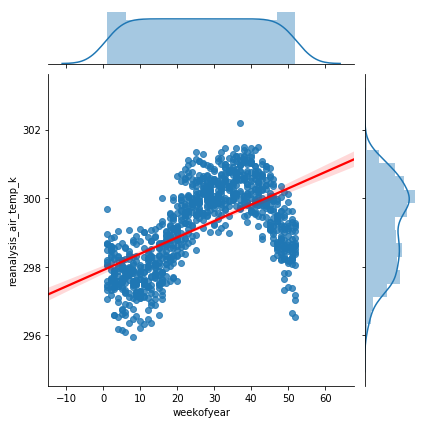

In [22]:
c = sns.jointplot(x="weekofyear", y="reanalysis_air_temp_k", data=df_1, kind='reg',joint_kws={'line_kws':{'color':'red'}})

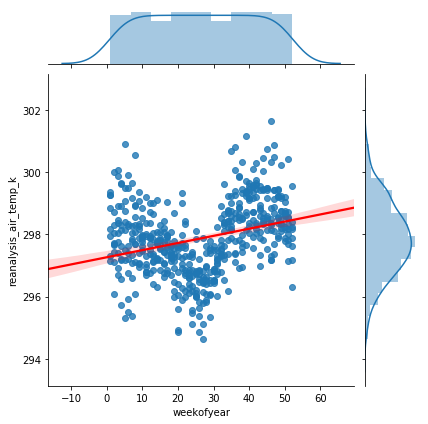

In [23]:
d = sns.jointplot(x="weekofyear", y="reanalysis_air_temp_k", data=df_2, kind='reg',joint_kws={'line_kws':{'color':'red'}})

In [24]:
df_1['veg']=df_1['ndvi_ne']+df_1['ndvi_nw']+df_1['ndvi_se']+df_1['ndvi_sw']

In [25]:
df_2['veg']=df_2['ndvi_ne']+df_2['ndvi_nw']+df_2['ndvi_se']+df_2['ndvi_sw']

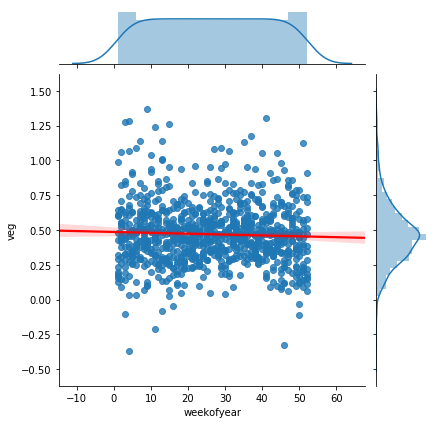

In [26]:
e = sns.jointplot(x="weekofyear", y="veg", data=df_1, kind='reg',joint_kws={'line_kws':{'color':'red'}})

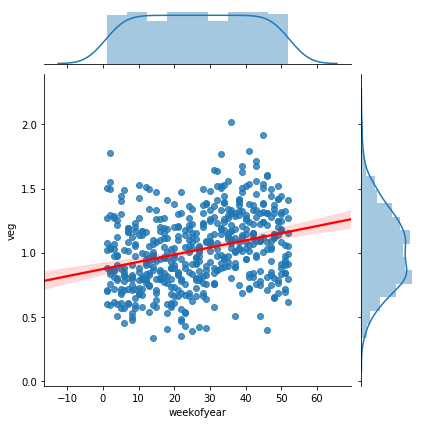

In [27]:
f = sns.jointplot(x="weekofyear", y="veg", data=df_2, kind='reg',joint_kws={'line_kws':{'color':'red'}})

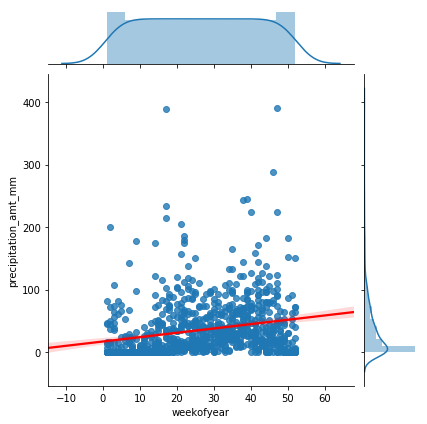

In [28]:
f = sns.jointplot(x="weekofyear", y="precipitation_amt_mm", data=df_1, kind='reg',joint_kws={'line_kws':{'color':'red'}})

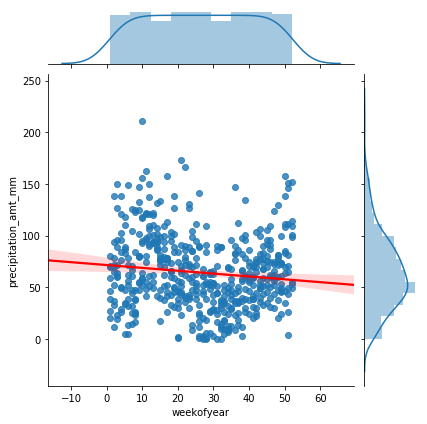

In [29]:
f = sns.jointplot(x="weekofyear", y="precipitation_amt_mm", data=df_2, kind='reg',joint_kws={'line_kws':{'color':'red'}})

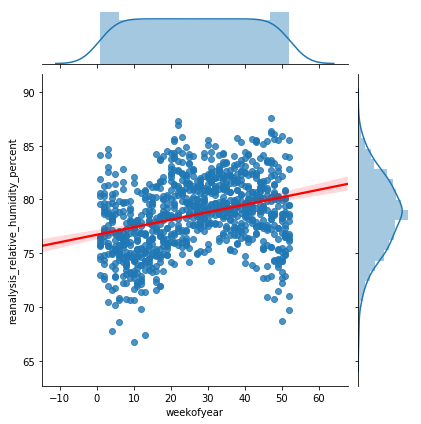

In [30]:
f = sns.jointplot(x="weekofyear", y="reanalysis_relative_humidity_percent", data=df_1, kind='reg',joint_kws={'line_kws':{'color':'red'}})

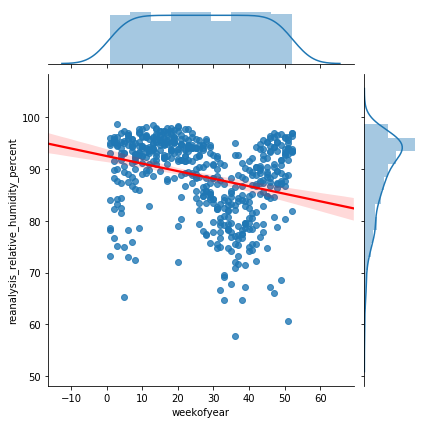

In [31]:
f = sns.jointplot(x="weekofyear", y="reanalysis_relative_humidity_percent", data=df_2, kind='reg',joint_kws={'line_kws':{'color':'red'}})

**Section 4 Machine Learning**

In [53]:
#X = df.drop(['total_cases'],axis=1).values
X_1 = df_1.drop(['total_cases'],axis=1)
#X_scaled_1 = preprocessing.scale(X_1)
#normalized_X_1 = preprocessing.normalize(X_1)

In [54]:
#X = df.drop(['total_cases'],axis=1).values
X_2 = df_2.drop(['total_cases'],axis=1)
#X_scaled_2 = preprocessing.scale(X_2)
#normalized_X_2 = preprocessing.normalize(X_2)

In [55]:
#y = df['total_cases'].values
y_1 = df_1['total_cases']

In [56]:
#y = df['total_cases'].values
y_2 = df_2['total_cases']

In [57]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.3, random_state=0)

In [58]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.3, random_state=0)

In [59]:
clf_rf = ske.RandomForestRegressor(n_estimators=2000,n_jobs=-1)
clf_rf_1 = clf_rf.fit(X_train_1, y_train_1)
print(clf_rf_1.score(X_test_1,y_test_1))

0.6693155373179782


In [60]:
clf_rf = ske.RandomForestRegressor(n_estimators=2000,max_features=0.9,n_jobs=-1)
clf_rf_2 = clf_rf.fit(X_train_2, y_train_2)
print(clf_rf_2.score(X_test_2,y_test_2))

0.08625996786950885


In [61]:
clf_gb = ske.GradientBoostingRegressor(n_estimators=2000)
clf_gb_1 = clf_gb.fit(X_train_1, y_train_1)
print(clf_gb_1.score(X_test_1,y_test_1))

0.6727199421509935


In [62]:
clf_gb = ske.GradientBoostingRegressor(n_estimators=2000)
clf_gb_2 = clf_gb.fit(X_train_2, y_train_2)
print(clf_gb_2.score(X_test_2,y_test_2))

0.10150283099223645
